In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

In [3]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
summary_statistics = train_data.describe()

summary_statistics

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


- The average sale price of the houses in the dataset is approximately $180,921.
- The sale prices range from $34,900 to $755,000.
- 50% of the houses have a sale price below $163,000 (median).

In [5]:
missing_values = train_data.isnull().sum()
missing_values_percentage = (missing_values / len(train_data)) * 100

# Filter out columns with missing values for display
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_values_percentage})
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage (%)', ascending=False)

missing_data

,Missing Values,Percentage (%)
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


Several columns in the dataset have missing values. Here are some columns with the highest percentage of missing data:

1. **PoolQC (Pool Quality)** - 99.52% missing values
2. **MiscFeature (Miscellaneous feature not covered in other categories)** - 96.30% missing values
4. **Alley (Type of alley access to property)** - 93.77% missing values
5. **Fence (Fence quality)** - 80.75% missing values
6. **FireplaceQu (Fireplace quality)** - 47.26% missing values

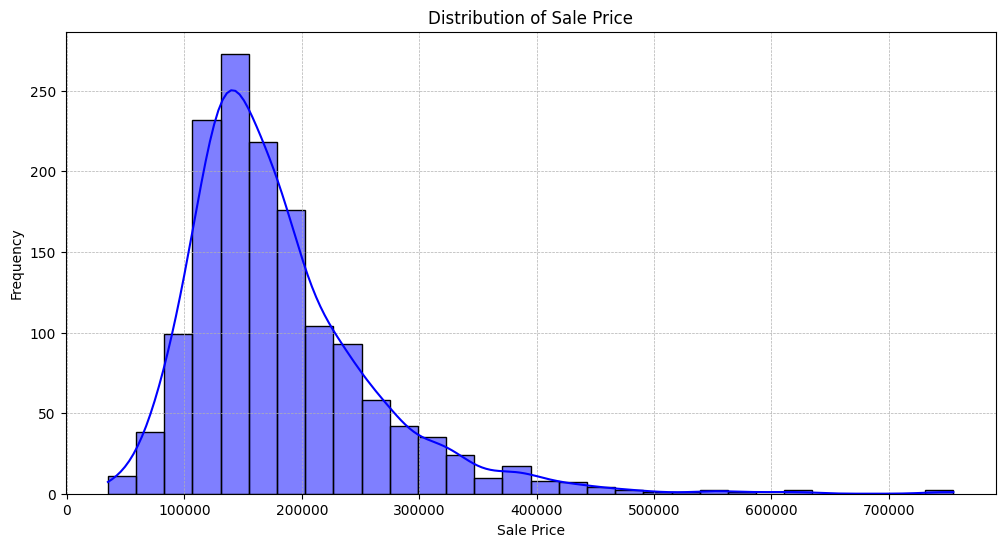

In [6]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Distribution of SalePrice
sns.histplot(train_data['SalePrice'], kde=True, bins=30, color='blue')
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


The distribution of SalePrice is right-skewed, which means there are a few houses with exceptionally high prices compared to the majority. Most of the houses fall within the lower to mid-range price segment.

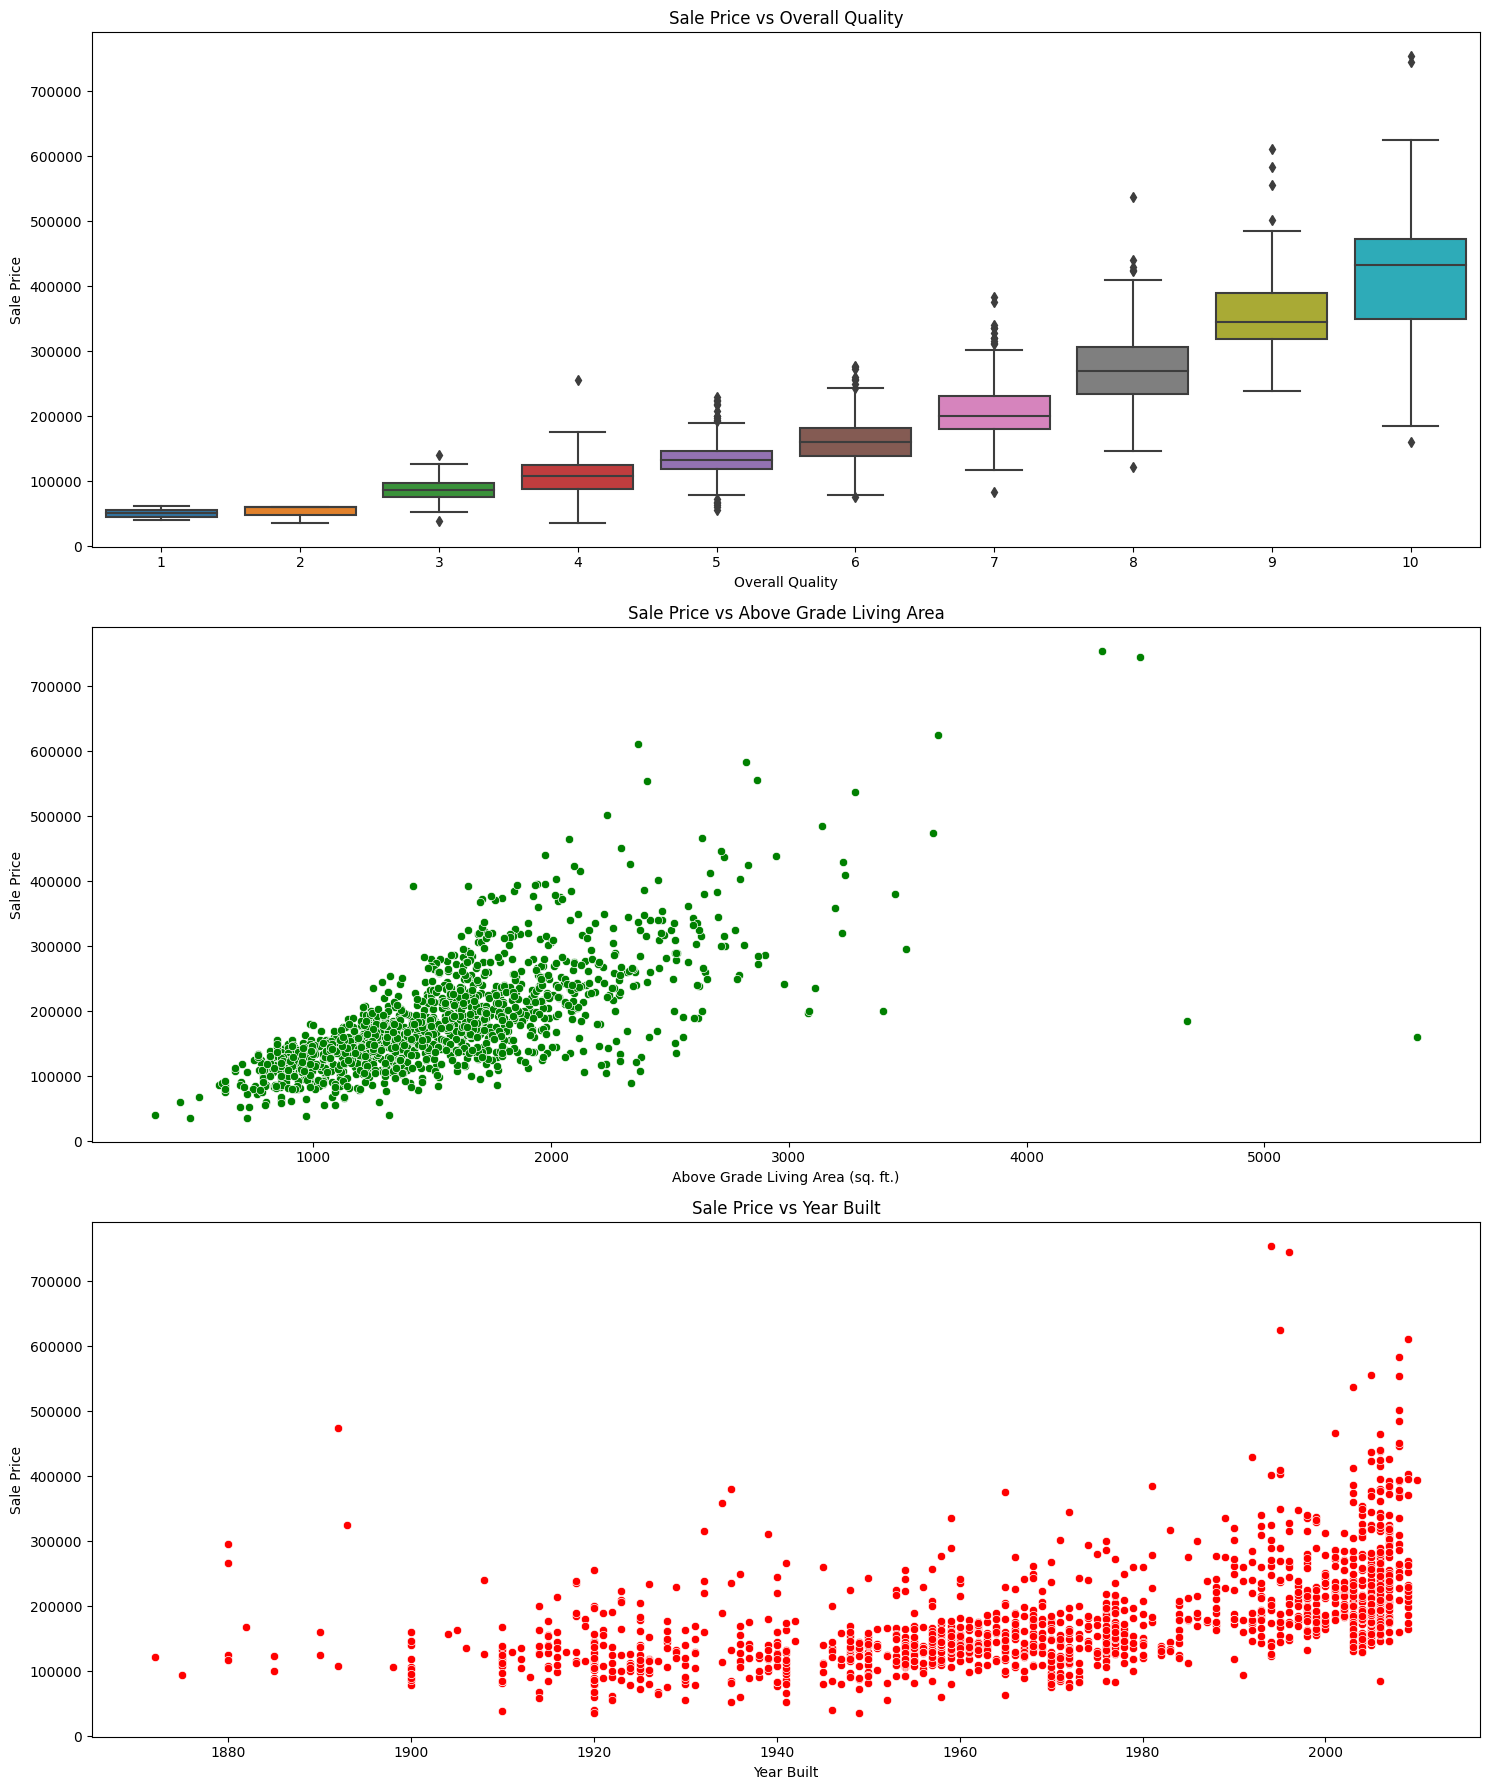

In [7]:
# Set up the matplotlib figure
fig, ax = plt.subplots(3, 1, figsize=(15, 18))

# Relationship between OverallQual and SalePrice
sns.boxplot(data=train_data, x='OverallQual', y='SalePrice', ax=ax[0])
ax[0].set_title('Sale Price vs Overall Quality')
ax[0].set_ylabel('Sale Price')
ax[0].set_xlabel('Overall Quality')

# Relationship between GrLivArea and SalePrice
sns.scatterplot(data=train_data, x='GrLivArea', y='SalePrice', ax=ax[1], color='green')
ax[1].set_title('Sale Price vs Above Grade Living Area')
ax[1].set_ylabel('Sale Price')
ax[1].set_xlabel('Above Grade Living Area (sq. ft.)')

# Relationship between YearBuilt and SalePrice
sns.scatterplot(data=train_data, x='YearBuilt', y='SalePrice', ax=ax[2], color='red')
ax[2].set_title('Sale Price vs Year Built')
ax[2].set_ylabel('Sale Price')
ax[2].set_xlabel('Year Built')

plt.tight_layout()
plt.show()


1. **Sale Price vs. Overall Quality:**

There's a clear positive correlation between the overall quality of a house and its sale price. As the quality rating increases, the median sale price of houses in that category also increases.

2. **Sale Price vs. Above Grade Living Area:**

There's a positive relationship between the living area (in sq. ft.) above ground and the sale price. Larger houses (in terms of living area) generally tend to fetch higher prices. There are a few potential outliers, especially larger houses that sold for a relatively low price.

3. **Sale Price vs. Year Built:**

Newer houses generally tend to be priced higher, indicating a positive correlation between the year a house was built and its sale price. However, there are some older houses that also have high prices, potentially due to their historic or architectural significance.

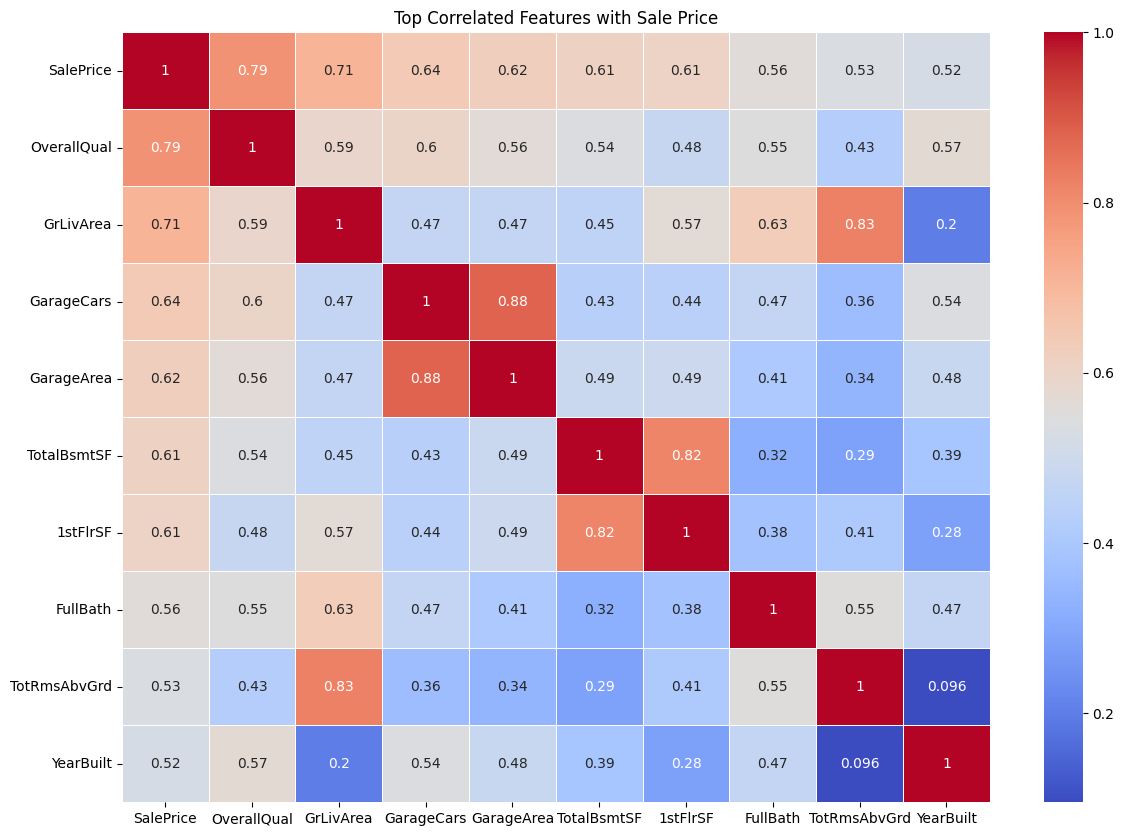

In [8]:
# Calculate the correlation matrix
correlation_matrix = train_data.corr(numeric_only=True)

# Get the most correlated features with SalePrice
top_correlated_features = correlation_matrix.nlargest(10, 'SalePrice')['SalePrice'].index

# Compute the correlation matrix for these features
top_corr_matrix = train_data[top_correlated_features].corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(top_corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, linecolor='white')
plt.title('Top Correlated Features with Sale Price')
plt.show()


1. OverallQual has the highest positive correlation with SalePrice at 0.79. This reiterates our previous observation that the overall quality of a house significantly influences its price.
2. GrLivArea (Above grade living area) and TotalBsmtSF (Total square feet of basement area) also have strong positive correlations with the sale price.
3. GarageCars and GarageArea are highly correlated with each other (0.88). This makes sense as the number of cars that fit into a garage is directly related to the garage's size. Both these features also have strong positive correlations with the sale price. However, due to their multicollinearity, we might consider using only one of them if building a predictive model.
4. 1stFlrSF (First Floor square feet) and TotalBsmtSF are also correlated (0.82), implying that houses with a larger basement area also tend to have a larger first floor.

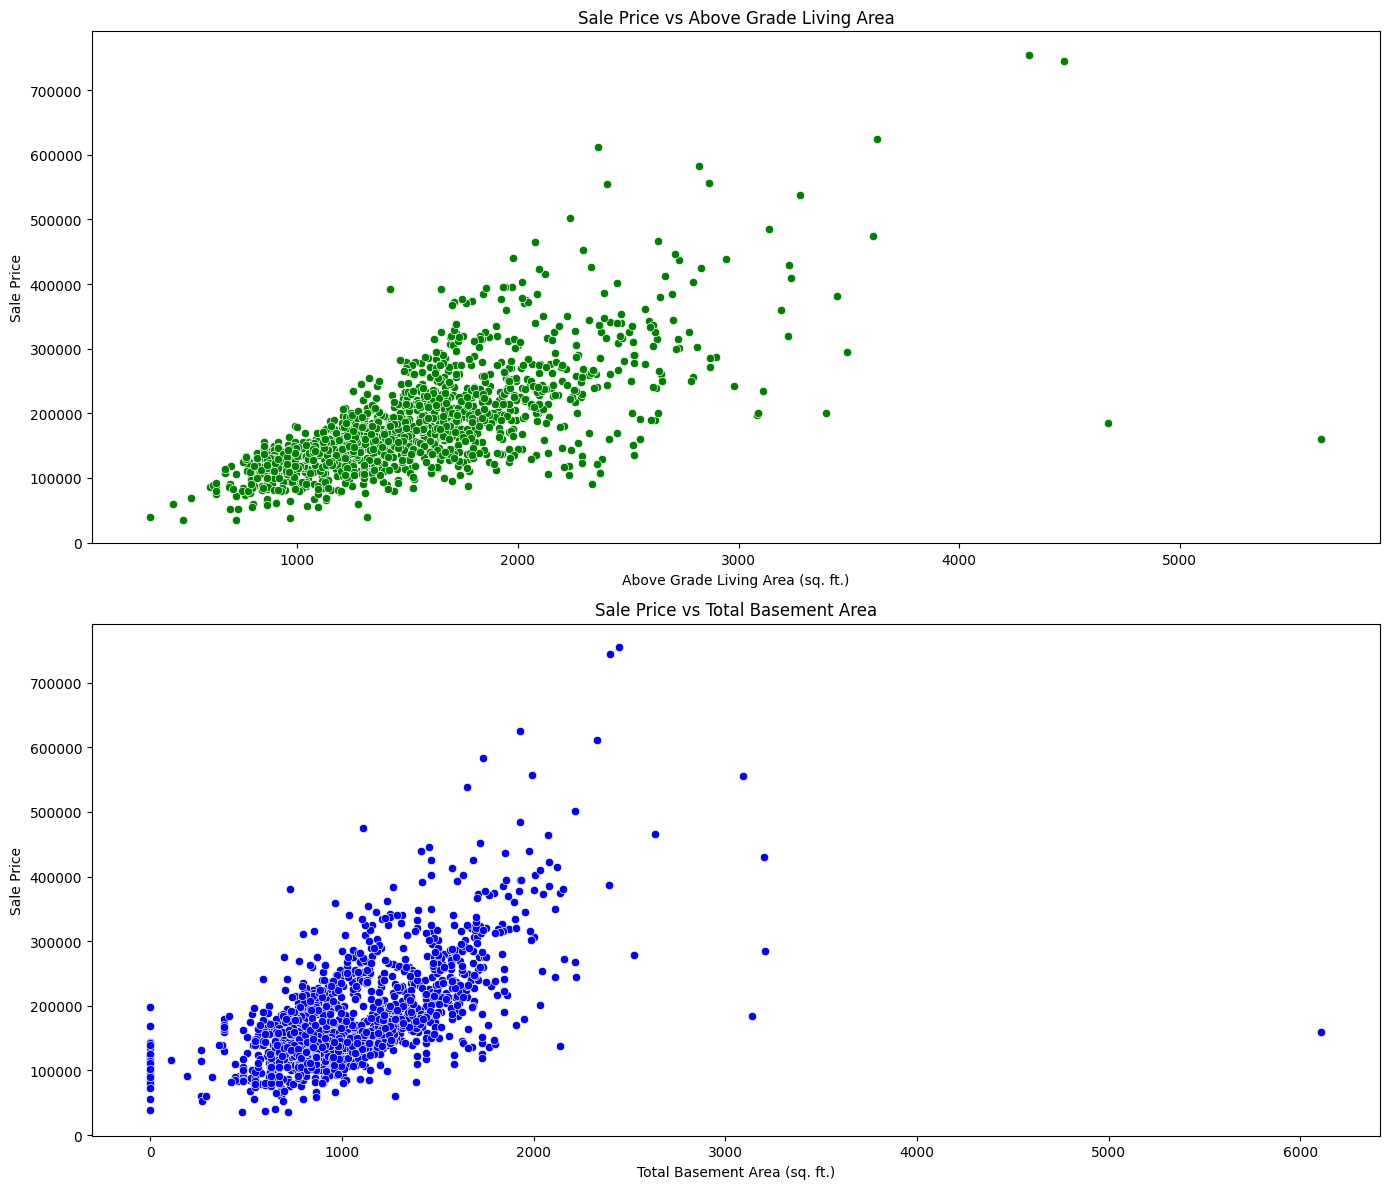

In [9]:
# Set up the matplotlib figure
fig, ax = plt.subplots(2, 1, figsize=(14, 12))

# Scatter plot for GrLivArea vs SalePrice
sns.scatterplot(data=train_data, x='GrLivArea', y='SalePrice', ax=ax[0], color='green')
ax[0].set_title('Sale Price vs Above Grade Living Area')
ax[0].set_xlabel('Above Grade Living Area (sq. ft.)')
ax[0].set_ylabel('Sale Price')

# Scatter plot for TotalBsmtSF vs SalePrice
sns.scatterplot(data=train_data, x='TotalBsmtSF', y='SalePrice', ax=ax[1], color='blue')
ax[1].set_title('Sale Price vs Total Basement Area')
ax[1].set_xlabel('Total Basement Area (sq. ft.)')
ax[1].set_ylabel('Sale Price')

plt.tight_layout()
plt.show()


1. **GrLivArea vs SalePrice:**

There are a few houses with a large living area (above 4000 sq. ft.) but a relatively low sale price. These points deviate from the general trend and can be considered as outliers.

2. **TotalBsmtSF vs SalePrice:**

A similar observation can be made for houses with a very large basement area (above 5000 sq. ft.) but a low sale price.

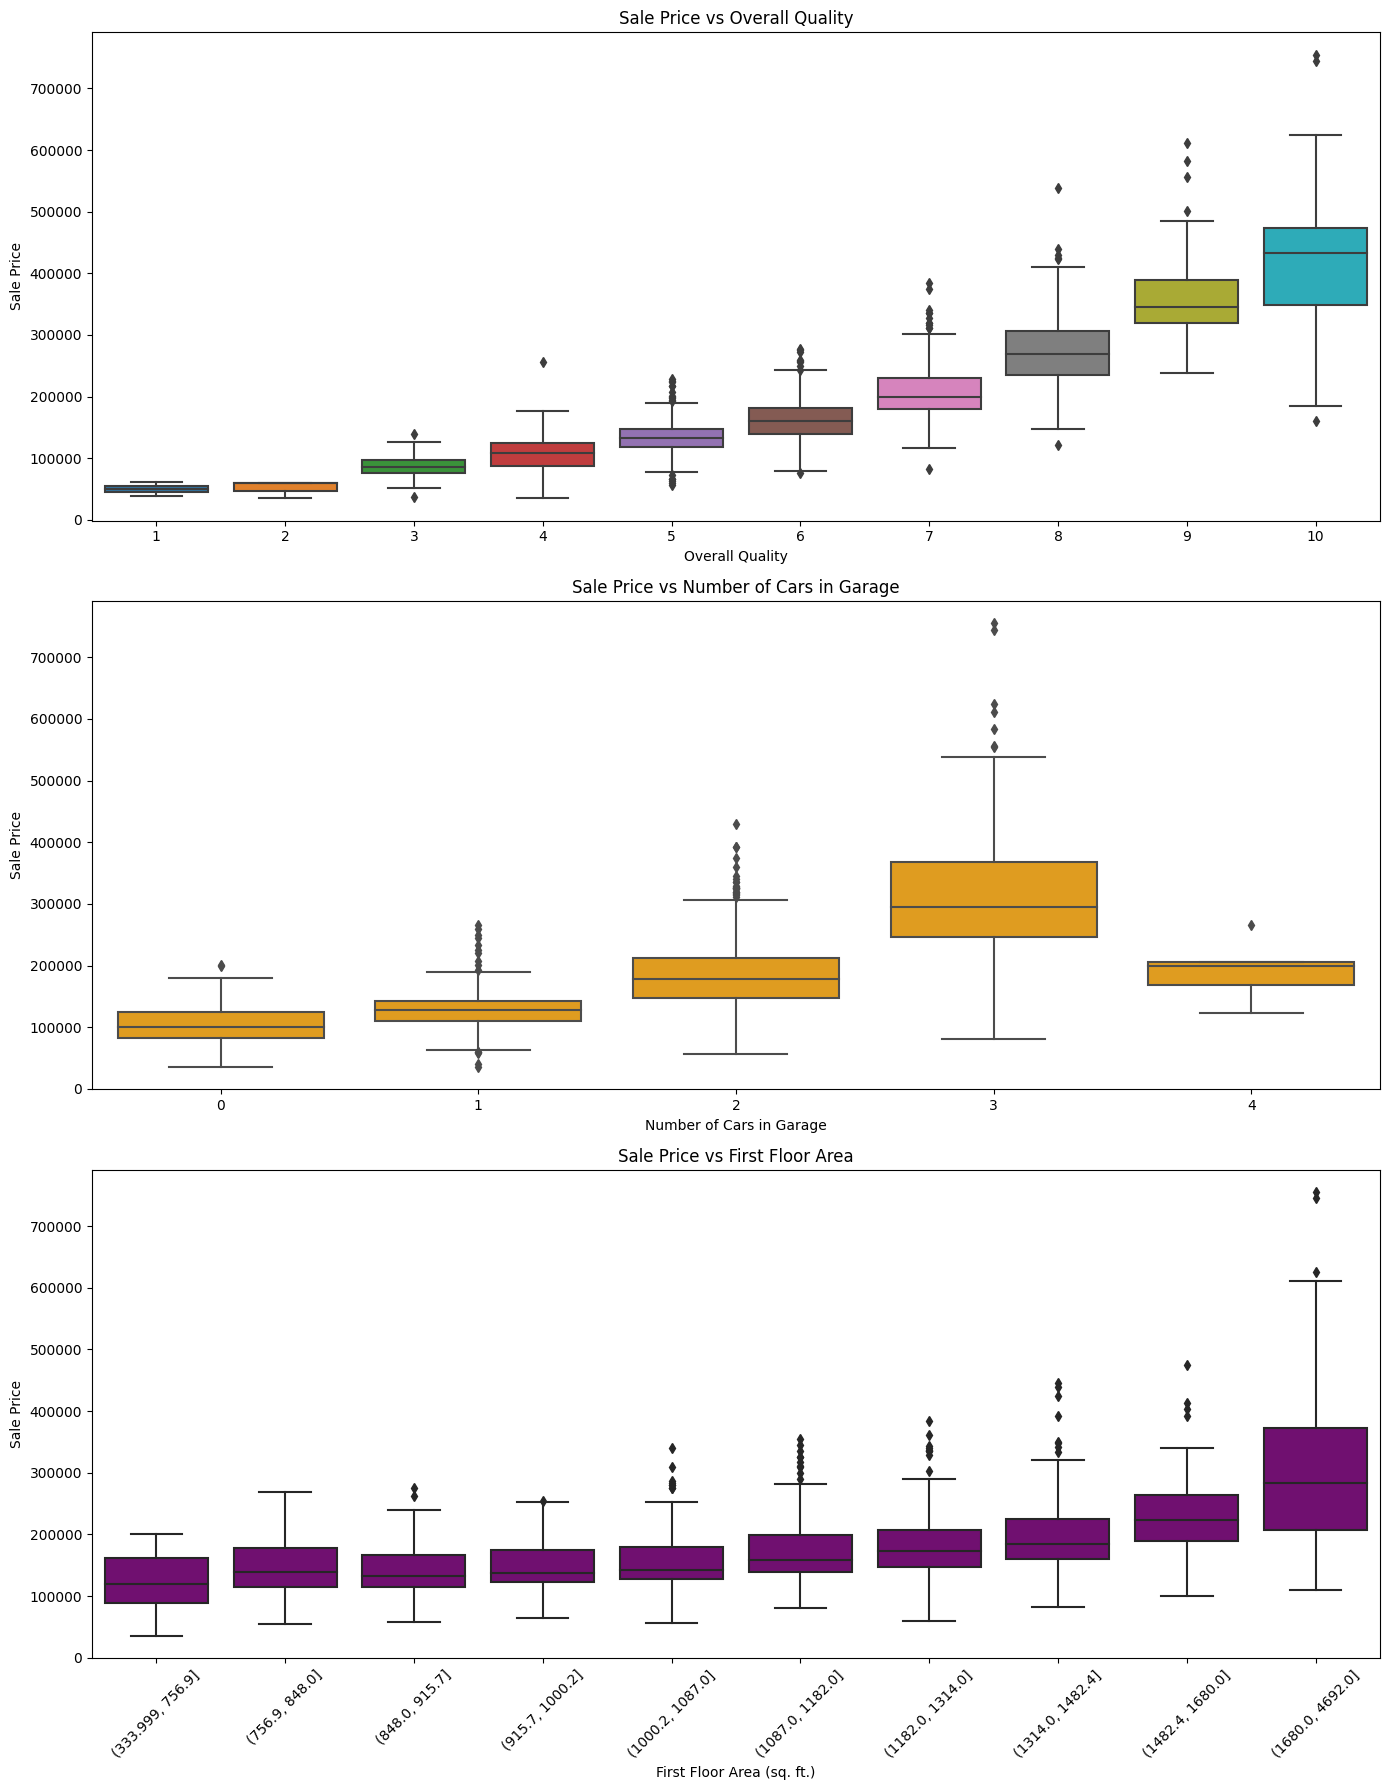

In [10]:
# Set up the matplotlib figure
fig, ax = plt.subplots(3, 1, figsize=(14, 18))

# Box plot for OverallQual vs SalePrice
sns.boxplot(data=train_data, x='OverallQual', y='SalePrice', ax=ax[0])
ax[0].set_title('Sale Price vs Overall Quality')
ax[0].set_xlabel('Overall Quality')
ax[0].set_ylabel('Sale Price')

# Box plot for GarageCars vs SalePrice
sns.boxplot(data=train_data, x='GarageCars', y='SalePrice', ax=ax[1], color='orange')
ax[1].set_title('Sale Price vs Number of Cars in Garage')
ax[1].set_xlabel('Number of Cars in Garage')
ax[1].set_ylabel('Sale Price')

# Box plot for 1stFlrSF vs SalePrice
sns.boxplot(data=train_data, x=pd.qcut(train_data['1stFlrSF'], q=10), y='SalePrice', ax=ax[2], color='purple')
ax[2].set_title('Sale Price vs First Floor Area')
ax[2].set_xlabel('First Floor Area (sq. ft.)')
ax[2].set_ylabel('Sale Price')
ax[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


1. OverallQual vs SalePrice:

For certain quality ratings, there are houses (data points) that fall outside the whiskers of the box plot. These could be potential outliers. For instance, in the quality rating of 10, there are a few houses with prices significantly lower than the upper whisker.

2. GarageCars vs SalePrice:

Houses with a 3-car garage capacity show a wide range of sale prices. There are a few houses in this category with prices significantly higher than the upper whisker, which could be considered outliers.
Interestingly, the median sale price for houses with a 4-car garage capacity is lower than that for 3-car garages. There are also potential outliers in this category.

3. 1stFlrSF vs SalePrice:

We've divided the first floor area into deciles (10 equally sized bins) for better visualization. Some bins, especially those representing larger areas, have potential outliers both on the lower and upper ends.

## Feature Engineering  

In [11]:
# threshold for missing values
threshold = 0.7

# Columns to be removed
columns_to_remove = missing_data[missing_data['Percentage (%)'] > threshold * 100].index.tolist()

# Drop these columns
cleaned_data = train_data.drop(columns=columns_to_remove)

# Display the columns that were removed
columns_to_remove

['PoolQC', 'MiscFeature', 'Alley', 'Fence']

In [12]:
# Correctly identify numerical and categorical columns with missing values
numerical_columns_with_na = cleaned_data.select_dtypes(include=['float64', 'int64']).columns[cleaned_data.select_dtypes(include=['float64', 'int64']).isnull().any()].tolist()
categorical_columns_with_na = cleaned_data.select_dtypes(include=['object']).columns[cleaned_data.select_dtypes(include=['object']).isnull().any()].tolist()

# Fill missing values for numerical columns with median
for column in numerical_columns_with_na:
    cleaned_data[column].fillna(cleaned_data[column].median(), inplace=True)

# Fill missing values for categorical columns with mode
for column in categorical_columns_with_na:
    cleaned_data[column].fillna(cleaned_data[column].mode()[0], inplace=True)

# Check if there are any missing values left
remaining_na = cleaned_data.isnull().sum().sum()

remaining_na


0

In [13]:
# Feature Creation

# Age of the House
cleaned_data['HouseAge'] = cleaned_data['YrSold'] - cleaned_data['YearBuilt']

# Years since Remodeling
cleaned_data['YearsSinceRemodel'] = cleaned_data['YrSold'] - cleaned_data['YearRemodAdd']

# Total Area of the House
cleaned_data['TotalArea'] = cleaned_data['TotalBsmtSF'] + cleaned_data['1stFlrSF'] + cleaned_data['2ndFlrSF']

# HasPool
cleaned_data['HasPool'] = cleaned_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

# HasGarage
cleaned_data['HasGarage'] = cleaned_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)

# HasBsmt
cleaned_data['HasBsmt'] = cleaned_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)


# Display the first few rows to check the newly created features
cleaned_data[['HouseAge', 'YearsSinceRemodel', 'TotalArea','HasPool', 'HasGarage', 'HasBsmt']].head()


,HouseAge,YearsSinceRemodel,TotalArea,HasPool,HasGarage,HasBsmt
0,5,5,2566,0,1,1
1,31,31,2524,0,1,1
2,7,6,2706,0,1,1
3,91,36,2473,0,1,1
4,8,8,3343,0,1,1


In [14]:
# Features to consider for outlier replacement
features_to_check = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold']

# Dictionary to store bounds for each feature
bounds = {}

# Replace outliers for each feature
for feature in features_to_check:
    Q1 = cleaned_data[feature].quantile(0.25)
    Q3 = cleaned_data[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    # Determine lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    bounds[feature] = (lower_bound, upper_bound)
    
    # Replace values outside the bounds with the respective bound values
    cleaned_data[feature] = cleaned_data[feature].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

bounds


{'MSSubClass': (-55.0, 145.0),
 'LotFrontage': (31.5, 107.5),
 'LotArea': (1481.5, 17673.5),
 'OverallQual': (2.0, 10.0),
 'OverallCond': (3.5, 7.5),
 'YearBuilt': (1885.0, 2069.0),
 'YearRemodAdd': (1911.5, 2059.5),
 'MasVnrArea': (-246.375, 410.625),
 'BsmtFinSF1': (-1068.375, 1780.625),
 'BsmtFinSF2': (0.0, 0.0),
 'BsmtUnfSF': (-654.5, 1685.5),
 'TotalBsmtSF': (42.0, 2052.0),
 '1stFlrSF': (118.125, 2155.125),
 '2ndFlrSF': (-1092.0, 1820.0),
 'LowQualFinSF': (0.0, 0.0),
 'GrLivArea': (158.625, 2747.625),
 'TotRmsAbvGrd': (2.0, 10.0),
 'GarageYrBlt': (1903.5, 2059.5),
 'GarageArea': (-27.75, 938.25),
 'WoodDeckSF': (-252.0, 420.0),
 'OpenPorchSF': (-102.0, 170.0),
 'EnclosedPorch': (0.0, 0.0),
 '3SsnPorch': (0.0, 0.0),
 'ScreenPorch': (0.0, 0.0),
 'MiscVal': (0.0, 0.0),
 'MoSold': (0.5, 12.5)}

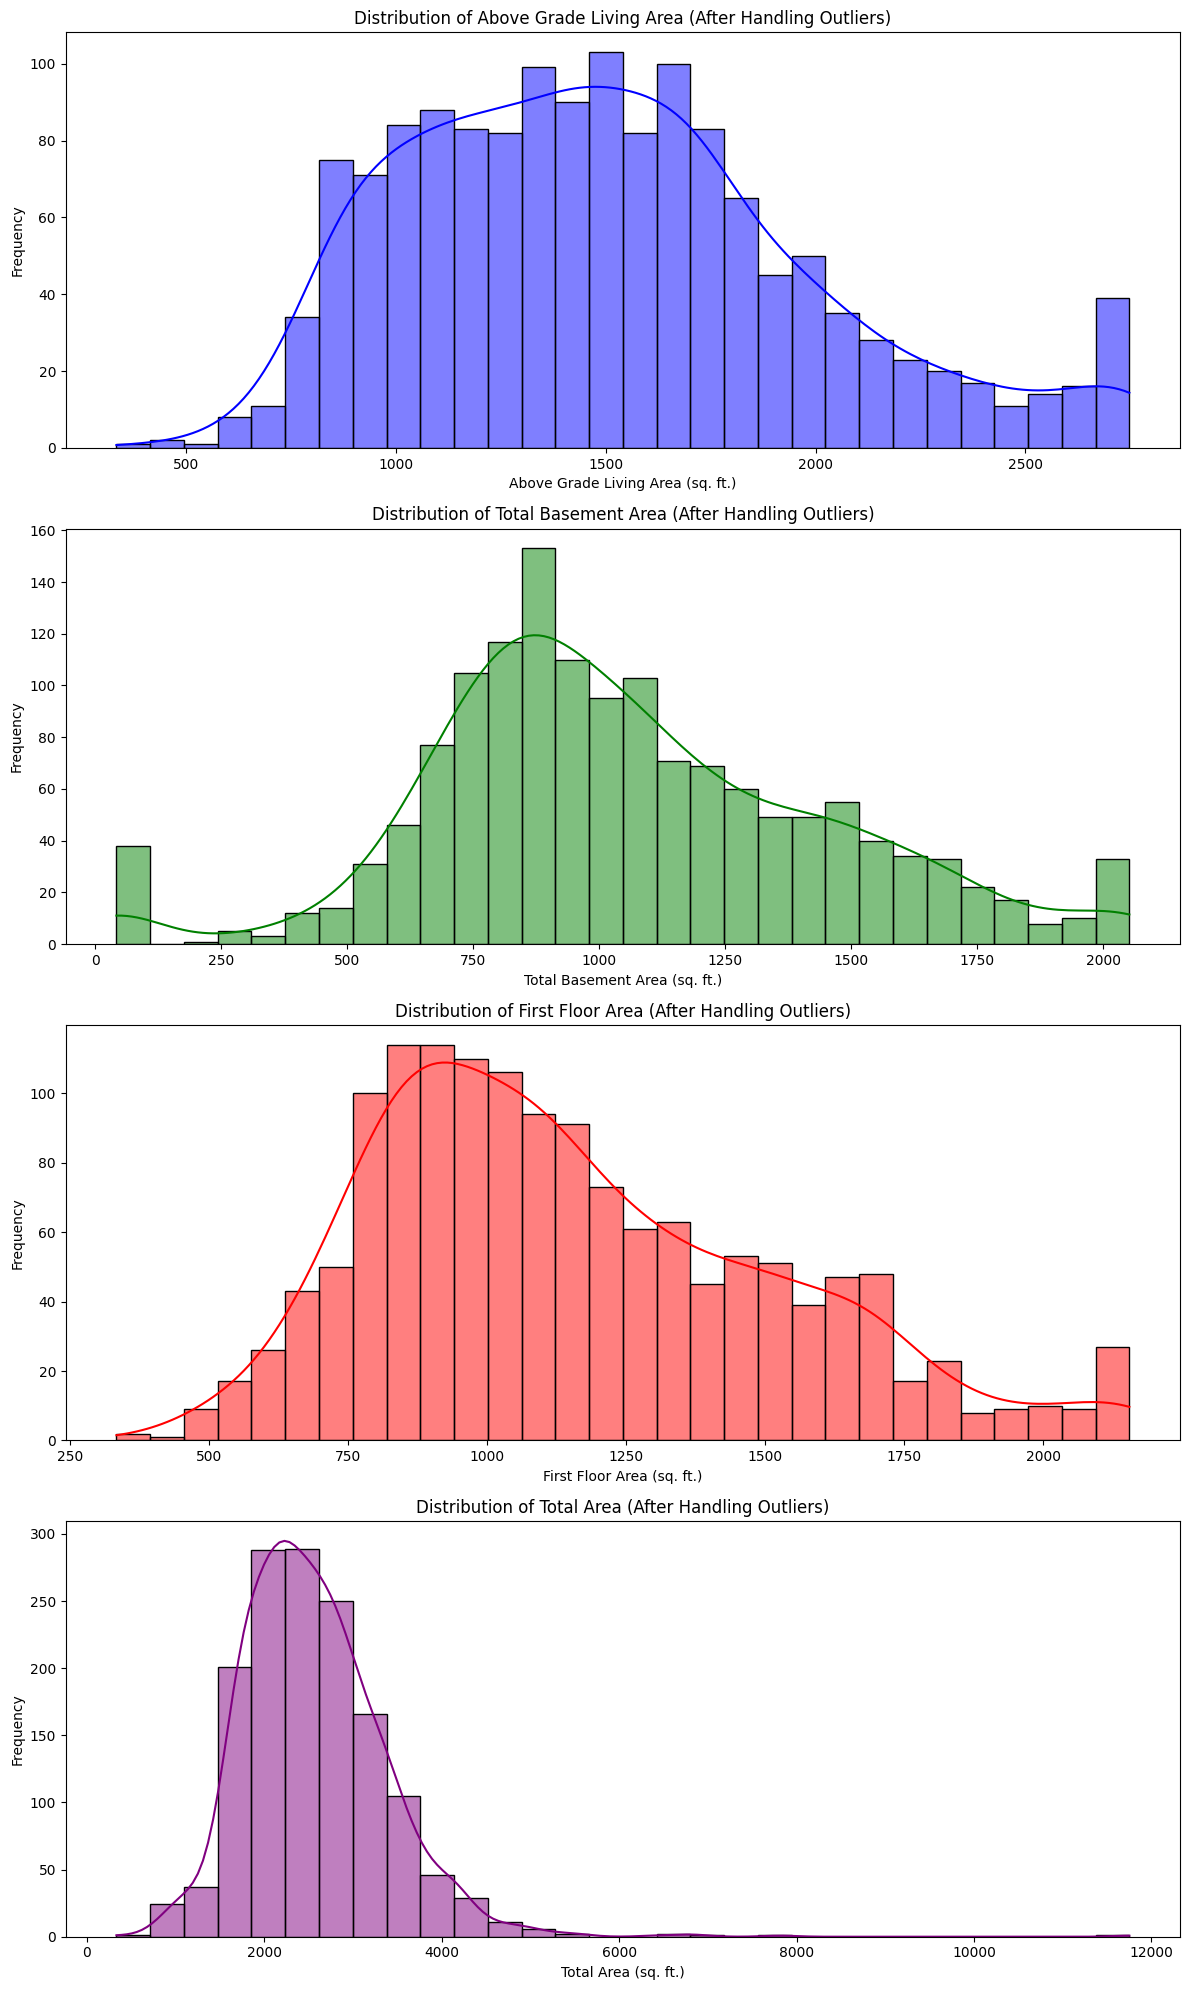

In [15]:
# Set up the matplotlib figure
fig, ax = plt.subplots(4, 1, figsize=(12, 20))

# Plotting the distributions
sns.histplot(cleaned_data['GrLivArea'], ax=ax[0], bins=30, color='blue', kde=True)
ax[0].set_title('Distribution of Above Grade Living Area (After Handling Outliers)')
ax[0].set_xlabel('Above Grade Living Area (sq. ft.)')
ax[0].set_ylabel('Frequency')

sns.histplot(cleaned_data['TotalBsmtSF'], ax=ax[1], bins=30, color='green', kde=True)
ax[1].set_title('Distribution of Total Basement Area (After Handling Outliers)')
ax[1].set_xlabel('Total Basement Area (sq. ft.)')
ax[1].set_ylabel('Frequency')

sns.histplot(cleaned_data['1stFlrSF'], ax=ax[2], bins=30, color='red', kde=True)
ax[2].set_title('Distribution of First Floor Area (After Handling Outliers)')
ax[2].set_xlabel('First Floor Area (sq. ft.)')
ax[2].set_ylabel('Frequency')

sns.histplot(cleaned_data['TotalArea'], ax=ax[3], bins=30, color='purple', kde=True)
ax[3].set_title('Distribution of Total Area (After Handling Outliers)')
ax[3].set_xlabel('Total Area (sq. ft.)')
ax[3].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


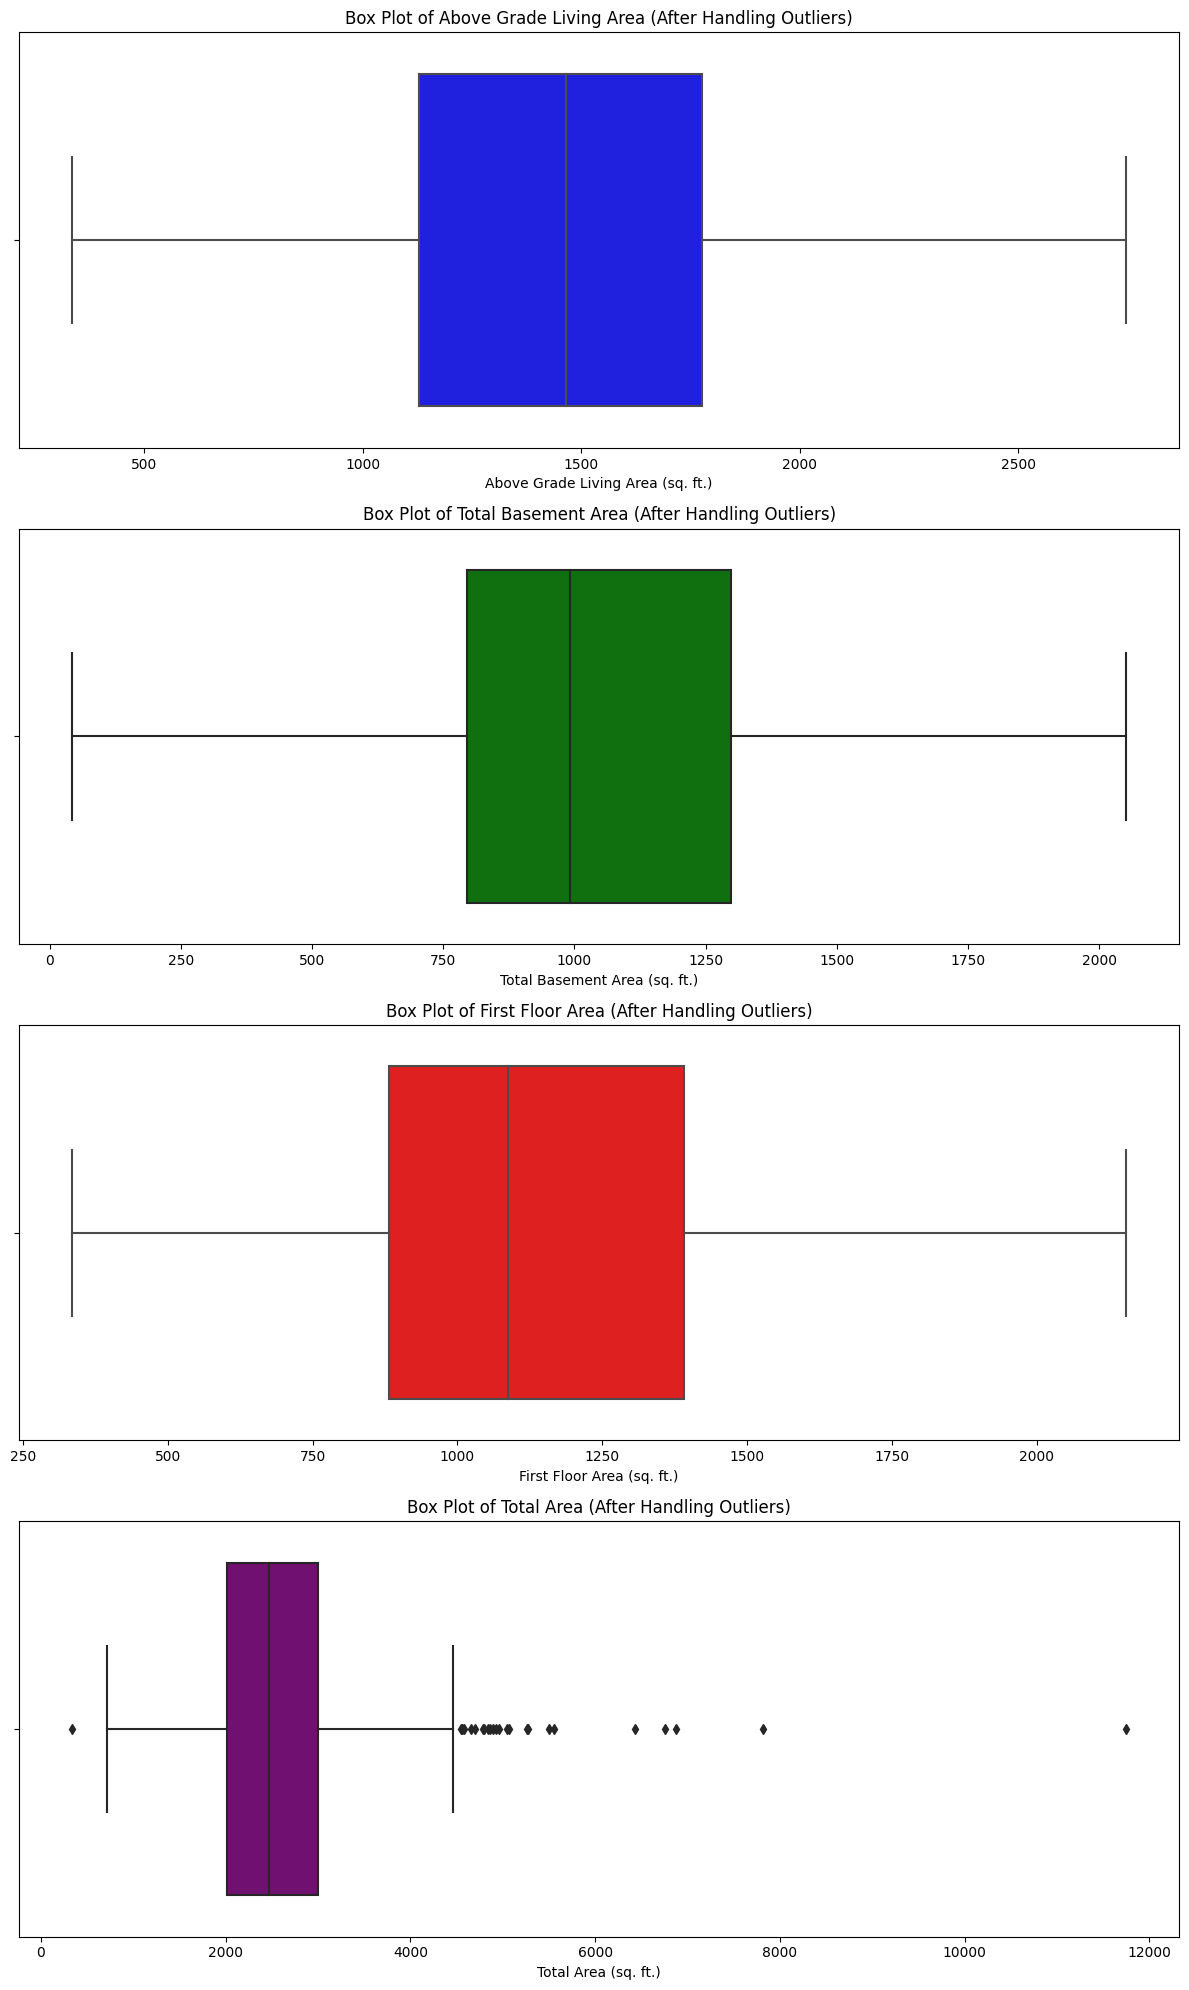

In [16]:
# Set up the matplotlib figure
fig, ax = plt.subplots(4, 1, figsize=(12, 20))

# Plotting the box plots
sns.boxplot(x=cleaned_data['GrLivArea'], ax=ax[0], color='blue')
ax[0].set_title('Box Plot of Above Grade Living Area (After Handling Outliers)')
ax[0].set_xlabel('Above Grade Living Area (sq. ft.)')

sns.boxplot(x=cleaned_data['TotalBsmtSF'], ax=ax[1], color='green')
ax[1].set_title('Box Plot of Total Basement Area (After Handling Outliers)')
ax[1].set_xlabel('Total Basement Area (sq. ft.)')

sns.boxplot(x=cleaned_data['1stFlrSF'], ax=ax[2], color='red')
ax[2].set_title('Box Plot of First Floor Area (After Handling Outliers)')
ax[2].set_xlabel('First Floor Area (sq. ft.)')

sns.boxplot(x=cleaned_data['TotalArea'], ax=ax[3], color='purple')
ax[3].set_title('Box Plot of Total Area (After Handling Outliers)')
ax[3].set_xlabel('Total Area (sq. ft.)')

plt.tight_layout()
plt.show()


In [17]:
new_cleaned_data = cleaned_data.copy()

In [18]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the encoder
label_encoders = {}

# Encode categorical columns
categorical_columns = cleaned_data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    le = LabelEncoder()
    cleaned_data[column] = le.fit_transform(cleaned_data[column])
    label_encoders[column] = le  # Store the encoder for potential inverse transformation

# Display first few rows after encoding
cleaned_data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,YrSold,SaleType,SaleCondition,SalePrice,HouseAge,YearsSinceRemodel,TotalArea,HasPool,HasGarage,HasBsmt
0,1,60.0,3,65.0,8450.0,1,3,3,0,4,...,2008,8,4,208500,5,5,2566,0,1,1
1,2,20.0,3,80.0,9600.0,1,3,3,0,2,...,2007,8,4,181500,31,31,2524,0,1,1
2,3,60.0,3,68.0,11250.0,1,0,3,0,4,...,2008,8,4,223500,7,6,2706,0,1,1
3,4,70.0,3,60.0,9550.0,1,0,3,0,0,...,2006,8,0,140000,91,36,2473,0,1,1
4,5,60.0,3,84.0,14260.0,1,0,3,0,2,...,2008,8,4,250000,8,8,3343,0,1,1


In [19]:
from sklearn.preprocessing import StandardScaler

# Select numerical features for scaling
numerical_features = cleaned_data.select_dtypes(include=['float64', 'int64']).columns.drop('Id')  # Excluding 'Id' column

# Instantiate the scaler
scaler = StandardScaler()

# Apply scaling to the numerical features
cleaned_data[numerical_features] = scaler.fit_transform(cleaned_data[numerical_features])

# Display first few rows after scaling
cleaned_data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,YrSold,SaleType,SaleCondition,SalePrice,HouseAge,YearsSinceRemodel,TotalArea,HasPool,HasGarage,HasBsmt
0,1,0.131067,3,-0.237456,-0.333244,1,3,3,0,4,...,0.138777,8,4,0.347273,-1.043259,-0.869941,-0.001277,-0.069409,0.24236,0.16125
1,2,-0.935733,3,0.633321,-0.013189,1,3,3,0,2,...,-0.614439,8,4,0.007288,-0.183465,0.390141,-0.052407,-0.069409,0.24236,0.16125
2,3,0.131067,3,-0.063300,0.446022,1,0,3,0,4,...,0.138777,8,4,0.536154,-0.977121,-0.821476,0.169157,-0.069409,0.24236,0.16125
3,4,0.397766,3,-0.527714,-0.027104,1,0,3,0,0,...,-1.367655,8,0,-0.515281,1.800676,0.632464,-0.114493,-0.069409,0.24236,0.16125
4,5,0.131067,3,0.865528,1.283733,1,0,3,0,2,...,0.138777,8,4,0.869843,-0.944052,-0.724547,0.944631,-0.069409,0.24236,0.16125


<module 'matplotlib.pyplot' from 'c:\\Users\\jatin\\.conda\\envs\\titanic\\Lib\\site-packages\\matplotlib\\pyplot.py'>

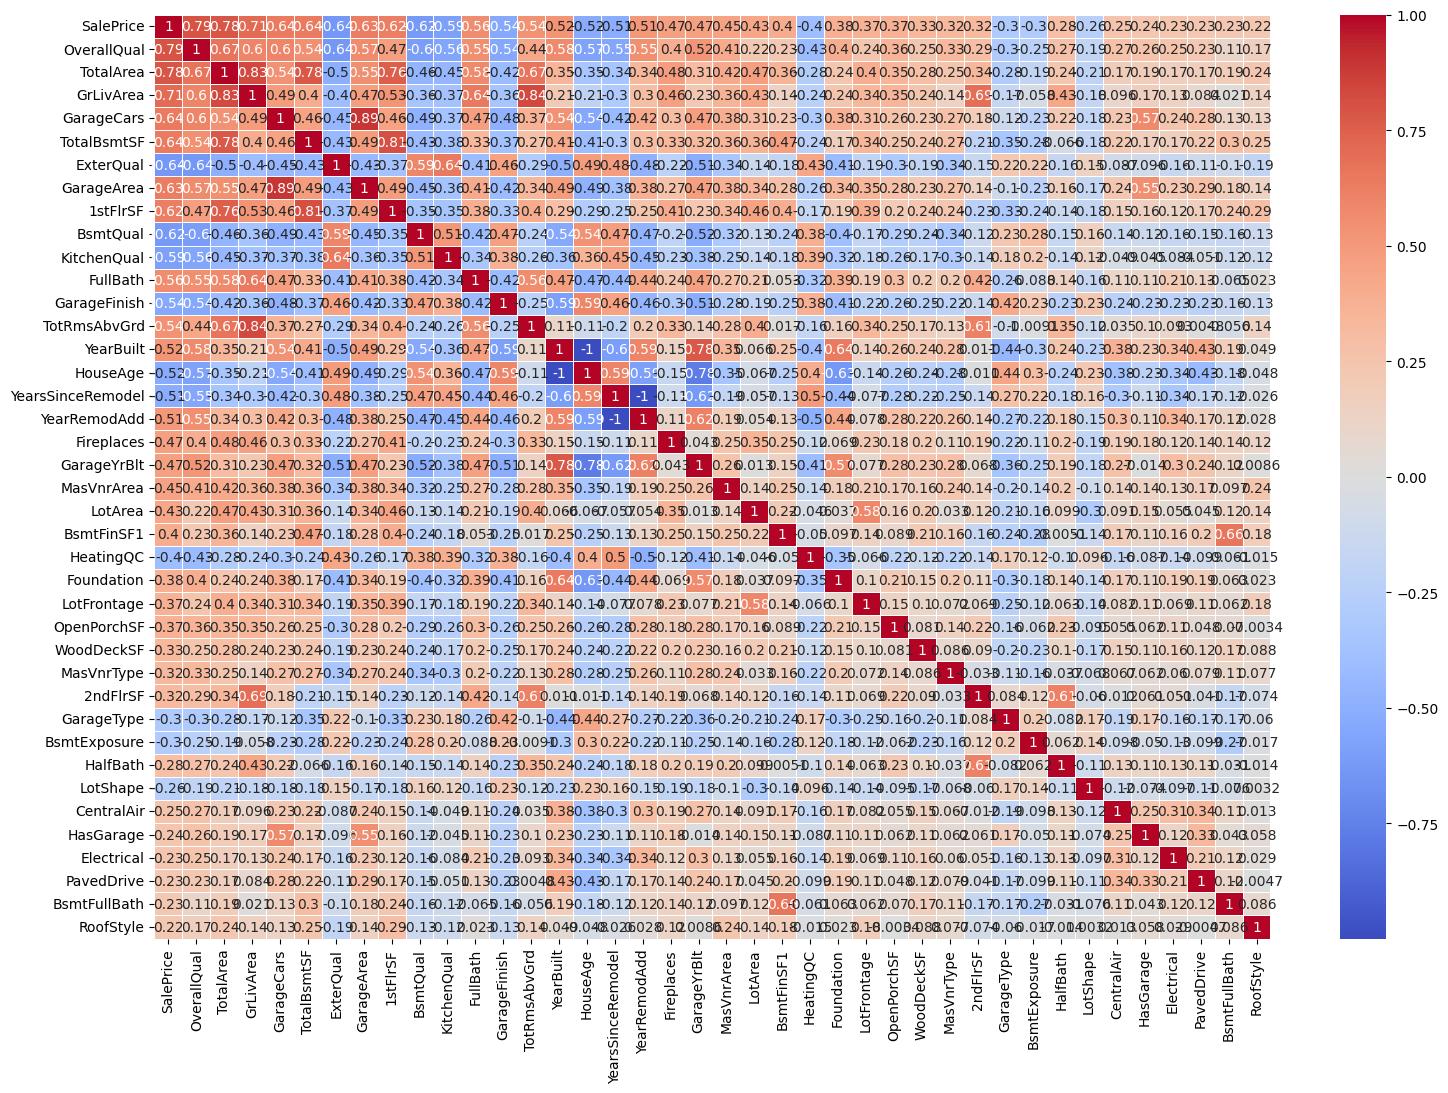

In [20]:
# Compute the correlation matrix
correlation_matrix = cleaned_data.corr(numeric_only=True)

# Sort correlations with SalePrice
top_correlations = correlation_matrix['SalePrice'].abs().sort_values(ascending=False)

# Select top 20 features most correlated with SalePrice
top_features = top_correlations.head(40).index  # Including SalePrice itself

# Generate a heatmap for these features
plt.figure(figsize=(18, 12))
sns.heatmap(cleaned_data[top_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt


In [21]:
# Select columns with a correlation greater than 0.45 with SalePrice
selected_features = top_correlations[top_correlations > 0.3].index.drop('SalePrice')  # Excluding SalePrice itself

print(len(selected_features))

print(selected_features.tolist())

# print selected features not in top_correlations 
print(set(selected_features.tolist()) - set(top_correlations.index.tolist()))

30
['OverallQual', 'TotalArea', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'ExterQual', 'GarageArea', '1stFlrSF', 'BsmtQual', 'KitchenQual', 'FullBath', 'GarageFinish', 'TotRmsAbvGrd', 'YearBuilt', 'HouseAge', 'YearsSinceRemodel', 'YearRemodAdd', 'Fireplaces', 'GarageYrBlt', 'MasVnrArea', 'LotArea', 'BsmtFinSF1', 'HeatingQC', 'Foundation', 'LotFrontage', 'OpenPorchSF', 'WoodDeckSF', 'MasVnrType', '2ndFlrSF', 'GarageType']
set()


In [22]:
top_features = top_correlations.index[1:17].tolist()
print(top_features)

# Generating only polynomial features (squared terms for top features)
for feature in top_features:
    cleaned_data[feature + '_squared'] = cleaned_data[feature] ** 2

# Update final_features list in CONFIG with only polynomial features
polynomial_features = [feature + '_squared' for feature in top_features]
selected_features.tolist().extend(polynomial_features)

cleaned_data[polynomial_features].head()

['OverallQual', 'TotalArea', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'ExterQual', 'GarageArea', '1stFlrSF', 'BsmtQual', 'KitchenQual', 'FullBath', 'GarageFinish', 'TotRmsAbvGrd', 'YearBuilt', 'HouseAge', 'YearsSinceRemodel']


,OverallQual_squared,TotalArea_squared,GrLivArea_squared,GarageCars_squared,TotalBsmtSF_squared,ExterQual_squared,GarageArea_squared,1stFlrSF_squared,BsmtQual_squared,KitchenQual_squared,FullBath_squared,GarageFinish_squared,TotRmsAbvGrd_squared,YearBuilt_squared,HouseAge_squared,YearsSinceRemodel_squared
0,0.425944,0.000002,0.183729,0.097172,0.238457,4,0.139509,0.689712,4,4,0.62369,1,0.962651,1.109327,1.088390,0.756797
1,0.005339,0.002746,0.252355,0.097172,0.283331,9,0.002656,0.083890,4,9,0.62369,1,0.100099,0.024392,0.033659,0.152210
2,0.425944,0.028614,0.344065,0.097172,0.107215,4,0.439987,0.427608,4,4,0.62369,1,0.100099,0.973767,0.954766,0.674823
3,0.425944,0.013109,0.196411,2.723513,0.547160,9,0.684820,0.292466,9,4,1.05276,4,0.110477,3.498876,3.242433,0.400011
4,1.899864,0.892328,2.081511,2.723513,0.056726,4,3.113740,0.001099,4,4,0.62369,1,2.656619,0.909299,0.891235,0.524968


In [23]:
# Generating interaction terms for top features
interaction_terms = []
for i in range(len(top_features)):
    for j in range(i+1, len(top_features)):
        new_column = top_features[i] + "_x_" + top_features[j]
        cleaned_data[new_column] = cleaned_data[top_features[i]] * cleaned_data[top_features[j]]
        interaction_terms.append(new_column)

# Update final_features list in CONFIG with interaction terms
selected_features.tolist().extend(interaction_terms)

cleaned_data[interaction_terms].head()

,OverallQual_x_TotalArea,OverallQual_x_GrLivArea,OverallQual_x_GarageCars,OverallQual_x_TotalBsmtSF,OverallQual_x_ExterQual,OverallQual_x_GarageArea,OverallQual_x_1stFlrSF,OverallQual_x_BsmtQual,OverallQual_x_KitchenQual,OverallQual_x_FullBath,...,GarageFinish_x_TotRmsAbvGrd,GarageFinish_x_YearBuilt,GarageFinish_x_HouseAge,GarageFinish_x_YearsSinceRemodel,TotRmsAbvGrd_x_YearBuilt,TotRmsAbvGrd_x_HouseAge,TotRmsAbvGrd_x_YearsSinceRemodel,YearBuilt_x_HouseAge,YearBuilt_x_YearsSinceRemodel,HouseAge_x_YearsSinceRemodel
0,-0.000833,0.279746,0.203445,-0.318699,1.305287,0.243768,-0.542013,1.305287,1.305287,0.515419,...,0.981148,1.053246,-1.043259,-0.869941,1.033390,-1.023592,-0.853541,-1.098809,-0.916262,0.907574
1,0.003829,0.036706,-0.022777,-0.038893,-0.219205,0.003766,-0.021163,-0.146136,-0.219205,-0.057705,...,-0.316385,0.156179,-0.183465,0.390141,-0.049413,0.058046,-0.123434,-0.028653,0.060932,-0.071577
2,0.110399,0.382822,0.203445,-0.213699,1.305287,0.432908,-0.426775,1.305287,1.305287,0.515419,...,-0.316385,0.986797,-0.977121,-0.821476,-0.312207,0.309146,0.259902,-0.964220,-0.810630,0.802682
3,-0.074723,0.289240,1.077062,-0.482762,1.957931,0.540088,-0.352950,1.957931,1.305287,-0.669639,...,0.664763,-3.741056,3.601351,1.264928,-0.621729,0.598511,0.210219,-3.368215,-1.183042,1.138863
4,1.302038,1.988615,2.274710,0.328286,2.756711,2.432217,-0.045703,2.756711,2.756711,1.088543,...,1.629914,0.953572,-0.944052,-0.724547,1.554240,-1.538724,-1.180949,-0.900222,-0.690908,0.684010


In [24]:
print(cleaned_data.columns.tolist())

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSol

In [25]:
selected_data = new_cleaned_data[selected_features.to_list() + ['SalePrice']]
X = selected_data.drop(columns=['SalePrice'])  
y = selected_data['SalePrice'] 

In [26]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25, shuffle=True)
X_train.shape, X_test.shape

((1095, 30), (365, 30))

In [27]:
from sklearn.preprocessing import OneHotEncoder
# cat columns 
selected_categorical_columns = X_train.select_dtypes(include=['object']).columns
# One-Hot Encoding
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)

# Fit the encoder and transform the training data
X_train_encoded = one_hot_encoder.fit_transform(X_train[selected_categorical_columns])
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=one_hot_encoder.get_feature_names_out(selected_categorical_columns))

# Transform the testing data
X_test_encoded = one_hot_encoder.transform(X_test[selected_categorical_columns])
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=one_hot_encoder.get_feature_names_out(selected_categorical_columns))

# Drop original categorical columns and add encoded ones
X_train = X_train.drop(columns=selected_categorical_columns).reset_index(drop=True)
X_train = pd.concat([X_train, X_train_encoded_df], axis=1)

X_test = X_test.drop(columns=selected_categorical_columns).reset_index(drop=True)
X_test = pd.concat([X_test, X_test_encoded_df], axis=1)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape


((1095, 49), (365, 49))

In [28]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Instantiate and train the model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predict on test data
lr_predictions = linear_reg.predict(X_test)

# Evaluate the model
print("Linear Regression MAE:", mean_absolute_error(y_test, lr_predictions))
print("Linear Regression RMSE:", mean_squared_error(y_test, lr_predictions, squared=False))
print("Linear Regression Accuracy:", linear_reg.score(X_test, y_test))


Linear Regression MAE: 19942.486571827336
Linear Regression RMSE: 30851.681378876503
Linear Regression Accuracy: 0.864127872618858


In [29]:
ridge = Ridge()
ridge.fit(X_train, y_train)
ridge_predictions = ridge.predict(X_test)
print("Ridge Regression MAE:", mean_absolute_error(y_test, ridge_predictions))
print("Ridge Regression RMSE:", mean_squared_error(y_test, ridge_predictions, squared=False))
print("Ridge Regression Accuracy:", ridge.score(X_test, y_test))


Ridge Regression MAE: 19933.39483914865
Ridge Regression RMSE: 30905.072650489907
Ridge Regression Accuracy: 0.86365719079687


In [30]:
lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_predictions = lasso.predict(X_test)
print("Lasso Regression MAE:", mean_absolute_error(y_test, lasso_predictions))
print("Lasso Regression RMSE:", mean_squared_error(y_test, lasso_predictions, squared=False))
print("Lasso Regression Accuracy:", lasso.score(X_test, y_test))

Lasso Regression MAE: 19918.91927315278
Lasso Regression RMSE: 30824.283289556945
Lasso Regression Accuracy: 0.8643690901834552


In [31]:
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
elastic_net_predictions = elastic_net.predict(X_test)
print("Elastic Net Regression MAE:", mean_absolute_error(y_test, elastic_net_predictions))
print("Elastic Net Regression RMSE:", mean_squared_error(y_test, elastic_net_predictions, squared=False))
print("Elastic Net Regression Accuracy:", elastic_net.score(X_test, y_test))

Elastic Net Regression MAE: 20356.31460956193
Elastic Net Regression RMSE: 34642.31934711232
Elastic Net Regression Accuracy: 0.8286884588843999


In [32]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
random_forest_predictions = random_forest.predict(X_test)
print("Random Forest Regression MAE:", mean_absolute_error(y_test, random_forest_predictions))
print("Random Forest Regression RMSE:", mean_squared_error(y_test, random_forest_predictions, squared=False))
print("Random Forest Regression Accuracy:", random_forest.score(X_test, y_test))


Random Forest Regression MAE: 17555.24244748859
Random Forest Regression RMSE: 28048.760211850764
Random Forest Regression Accuracy: 0.8876947550002545


In [33]:
gradient_boosting = GradientBoostingRegressor()
gradient_boosting.fit(X_train, y_train)
gradient_boosting_predictions = gradient_boosting.predict(X_test)
print("Gradient Boosting Regression MAE:", mean_absolute_error(y_test, gradient_boosting_predictions))
print("Gradient Boosting Regression RMSE:", mean_squared_error(y_test, gradient_boosting_predictions, squared=False))
print("Gradient Boosting Regression Accuracy:", gradient_boosting.score(X_test, y_test))


Gradient Boosting Regression MAE: 17000.171451856102
Gradient Boosting Regression RMSE: 25318.74560528011
Gradient Boosting Regression Accuracy: 0.9084924199295925


In [34]:
bagging = BaggingRegressor()
bagging.fit(X_train, y_train)
bagging_predictions = bagging.predict(X_test)
print("Bagging Regression MAE:", mean_absolute_error(y_test, bagging_predictions))
print("Bagging Regression RMSE:", mean_squared_error(y_test, bagging_predictions, squared=False))
print("Bagging Regression Accuracy:", bagging.score(X_test, y_test))


Bagging Regression MAE: 19326.253515981734
Bagging Regression RMSE: 30253.97635026186
Bagging Regression Accuracy: 0.8693415125351891


In [35]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb_predictions = xgb.predict(X_test)
print("XGBoost Regression MAE:", mean_absolute_error(y_test, xgb_predictions))
print("XGBoost Regression RMSE:", mean_squared_error(y_test, xgb_predictions, squared=False))
print("XGBoost Regression Accuracy:", xgb.score(X_test, y_test))

XGBoost Regression MAE: 18970.402846746576
XGBoost Regression RMSE: 28429.130777047594
XGBoost Regression Accuracy: 0.8846281483514874
